<a href="https://colab.research.google.com/github/adithya-prabhu-22/deep_learning_algos/blob/main/early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from pylab import rcParams
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [5]:
x,y= make_circles(n_samples=1000, noise=0.1, random_state=42)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [7]:
model=Sequential()
model.add(Dense(256, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history=model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test))

Epoch 1/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5156 - loss: 0.6939 - val_accuracy: 0.5152 - val_loss: 0.6906
Epoch 2/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5796 - loss: 0.6900 - val_accuracy: 0.5818 - val_loss: 0.6874
Epoch 3/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5510 - loss: 0.6840 - val_accuracy: 0.5879 - val_loss: 0.6840
Epoch 4/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6152 - loss: 0.6761 - val_accuracy: 0.6030 - val_loss: 0.6810
Epoch 5/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6561 - loss: 0.6770 - val_accuracy: 0.6667 - val_loss: 0.6782
Epoch 6/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7170 - loss: 0.6719 - val_accuracy: 0.6545 - val_loss: 0.6762
Epoch 7/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7231 - loss: 0.6672 - val_accuracy: 0.6970 - val_loss: 0.6721
Epoch 8/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7794 - loss: 0.6605 - val_accuracy: 0

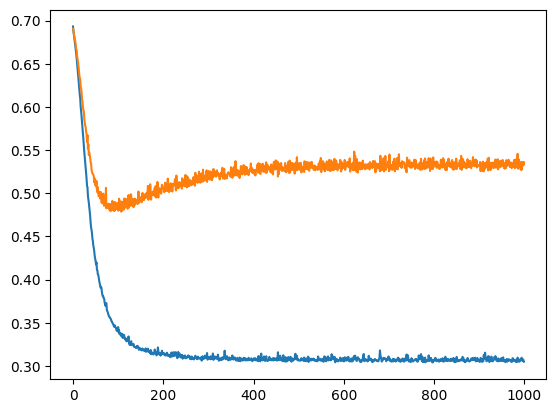

In [11]:
plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="test")
plt.show()

In [15]:
#early stopping
model2=Sequential()
model2.add(Dense(256, activation='relu', input_dim=2))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
callback=EarlyStopping(monitor='val_loss',
                       patience=34,
                       min_delta=0.00001,
                       verbose=1,
                       mode="auto",
                       baseline=None)

In [23]:
history=model2.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test), callbacks=[callback])

Epoch 1/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8501 - loss: 0.3265 - val_accuracy: 0.7636 - val_loss: 0.4971
Epoch 2/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8608 - loss: 0.3323 - val_accuracy: 0.7667 - val_loss: 0.4885
Epoch 3/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8488 - loss: 0.3348 - val_accuracy: 0.7636 - val_loss: 0.4923
Epoch 4/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8855 - loss: 0.2990 - val_accuracy: 0.7515 - val_loss: 0.5014
Epoch 5/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8544 - loss: 0.3255 - val_accuracy: 0.7636 - val_loss: 0.4941
Epoch 6/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8546 - loss: 0.3282 - val_accuracy: 0.7545 - val_loss: 0.4922
Epoch 7/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8670 - loss: 0.3037 - val_accuracy: 0.7636 - val_loss: 0.4987
Epoch 8/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8736 - loss: 0.2992 - val_accuracy